<a href="https://colab.research.google.com/github/kankeinai/Computational_physics/blob/main/a06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHY270 Assignment 6: Least-Squares Regression
Student name: Begantsova Milana

---
##Abstract
The purpose of this programming assignment is to study how we can fit data to some linear curve. The hypothesis is that we can choose such coefficients that they will form a curve that goes through even noicy data. To determine these coefficient, I will use two basic method called analytical approach and gradients descent. I will decide which method works better with our data set. I will try to fit our data with a straight line, exponential function and polinomial of second order. Then I will judge what function has fitted the data better based on visual representation, mean absolute error and number of iteration it took for cost function to converge. At the end of the programming assignment I will use python libary to fit our data to see if we can fit our data even better. Overall the exponential function fitted our sampling data in the most accurate way.

---
##Introduction
In different sciences, linear regression is usually used to fit continious data. This method is very important in forecasting, since linear regression can show us data' trends. We have already used linear regression in physics experiments when we needed to fit our data and usually get slope or intercepts. The linear regression' main idea is that any function can be approximated as linear/polinomial function (like in Taylor series). We just need some cost function (which will measure our error) and try to minimize its value. The smaller will be cost function, the better will be our linear regression (in case of our programming assignment).

In the first part of the experiment, I will look at our sampling data and make some predictions about best suitable function. Then I will construct a class of Linear regression which will be used for each function later on. I will also write a function to compute coefficient analytically and compare two methods.

In the second part, with Linear regression I will identify the weights of our functions and construct the graphs, where we will see how well our approximated function fits the data. Such graphs and equations will be done for all three functions: straight line, exponential function or polinomial of second order. And I will compare them at the end. Their accuracy will be judged according to value of mean absolute error.

---
##Methods
In our problem we condider a dataset with values of time ans voltage. Our goal is to draw a curve that will fit our data with minimum mean absolute error. To approach the solution of our problem I will use linear regression as it is suitable for continious data. To converge to solution, I will use gradient descent method, which is fine if we are trying to fit simple set of data (number of feature is low) with not that many data records (as it could be slow). I will also use analytical approach to solve this problem and show that the acuracy of the gradient descent is highier.

###Gradient descent
In this programming assignment, I will use least-squares regression and gradient descent to fit our data. The linear regression is based on the idea that we can identify such weights – $\omega$, that 
$$X\times\omega=h,$$
where $h$ is our hypothesis, $X$ is our data.
We want $h$ to be as close and precise to $y$, which is our solution.

The accuracy of our $h$ can be measured by cost function:
$$J(\theta)=\frac{1}{2m} \sum_{k=0}^{m} (h_k-y_k)^2$$
As we want $h$ to be as close to value of $y$ as possible, we would like to minimaze the cost function. From the optimization topic and Calculus, we know that we need the gradient to equal zero:
$$J'(\theta)=\frac{1}{m}\sum_{k=0}^{m}(h_k-y_k)x_k=\frac{1}{m}(h-y)\cdot X$$
The update rule for the weights will be:
$$\omega_i=\omega_i+\alpha\ J(\theta)'$$
The coefficient alpha we choose ourselves based on cost function values.
The update should be done simulteneously for each weights iteratively  till loss converge. We also can just write it in a vector form:
$$\omega=\omega-\alpha \ J(\theta)'$$
where the gradient of cost function will be computed only once for an update.


###Least-squares regression (analytical approach)
There is also one way to compute the gradient from normal equation:
$$J(\theta)=(h-y)^T(h-y)$$
then the normal equation is
$$J'(\theta)=2X^TX\omega-2X^Ty=0$$
we want the gradient to be 0, so the final formula for coefficient is
$$\theta=(X^TX)^{-1}X^Ty$$
Advantages of this method is that it is not iterative as gradient descent, no need to choose learning rate. But we need to compute inverse matrix which is $n^3$. But if the the matrix is small (low number of records) and has not many features, computationaly it will be more costly to iterate to convergence of cost function, than computing an innversematrix.

We can use both these methods for fitting sample data with a straight line, exponential function and polinomial of the second order. Before passing our data to the regression, we should change matrix $X$ or $y$ somehow.

###Straight line
From the middle school we know that the equation for the straight line is written as:
$$y=a_0+a_1x=\begin{bmatrix}
1 & x \end{bmatrix}\times \begin{bmatrix}
a_0 \\ a_1  \end{bmatrix} = X\times \omega$$
Where the first matrix is our matrix $X$ and second matrix are our coefficients or matrix $\omega$. As you can see there is additional '1' appeared in $X$ matrix, which is called bias unit. So, if we want to implement linear regression in a vector form, we should at first add this bias column of ones. In case of many data point we deal with a system of linear equations, which can be rewritten in a matrix form as:
$$\begin{bmatrix}1 & x_1 \\
1& x_2 \\
.. &.. \\
1 & x_m 
\end{bmatrix}\times \begin{bmatrix}
\omega_1 \\ \omega_2  \end{bmatrix} = X\times \omega$$

###Exponential function
We also are able to use linear regression to identify coefficient for exponential function. If we want our solution to be in a form of:
$$y=ce^{a_1x} =e^{a_0+a_1x}$$
We can simply take a logarithm of both sides and get:
$$ln(y) = a_0 + a_1x = \begin{bmatrix}
1 & x \end{bmatrix}\times \begin{bmatrix}
a_0 \\ a_1  \end{bmatrix} = X\times \omega,$$
which is as simple as a straight line. We just need to find such coefficients that the expression will be as lose as possible to $ln(y)$.

The only difference with "Straight line" approach is that we are passing not $y$, but $ln(y)$. The matrix $X$ will be the same with additional bias unit.

###Polinomial regression
Suppose we think that our data can be expressed as a polinomial of second order:
$$y=a_0+a_1x+a_2x^2=\begin{bmatrix}
1 & x & x^2\end{bmatrix}\times \begin{bmatrix}
a_0 \\ a_1 \\ a_2 \end{bmatrix} = X\times \omega$$
And if we have multiple data points thus system of linear equations, it can be written as:
$$\begin{bmatrix}1 & x_1 & x_1^2 \\
1& x_2 & x_2^2 \\
... &... &...\\
1 & x_m  & x_m^2
\end{bmatrix}\times \begin{bmatrix}
\omega_0 \\ \omega_1 \\ \omega_3 \end{bmatrix} = X\times \omega$$
So, to fit our data as a polinomial of second order we shoult include the column of our data squared and bias column.

To judge how well the identified function fitted the solution I will use a function from `sclearn.metrics` called mean_absolute_error(), which is used to measure the accuracy of continius data. I will divide this by mean value to get the value of mean absolute error for each method. To visually judge how well the curve fitted the function I will use `matplotlib.pyplot`to draw a scatter plot of all data point and `plot()` function to draw the curves.

---
##Description
Before discussing the problem, we should import all needed libraries. `matplotlib.plt` libry will be used for all visualizations including graphs of loss versus iterations and our curves. Pandas library will be used to read our data and store it as dataframe. Numpy library will be used in all operations that require to manipulate matrixes. Sklearn.metrics is used to evaluate accuracy of our linear models. 

In [ ]:
import matplotlib.pyplot as plt #visulization
import numpy as np #calculation
import pandas as pd #storage
from sklearn.metrics import mean_absolute_error #evaluation

###Part 1 - Data analysis
At first, we should download our .csv file. To read the file, I will use function `read_csv(path)` from pandas library.

In [ ]:
path = 'https://drive.google.com/uc?export=download&id=1RBXwhNt6BMpkiaS3GhsTFcHuSVBvqfnG'
data = pd.read_csv(path) 
data.head() #display first five records in data frame

,Time,Voltage
0,0.00,9.603045
1,0.02,8.361440
2,0.04,8.730039
3,0.06,8.313321
4,0.08,7.403970


We see that the dataframe has two colums: time – independent value, voltage – dependent. There is no need to convert dataframe to numpy arrays as we can access the columns of data by a keyword – column name:

In [ ]:
X = data['Time'].to_numpy()
y = data['Voltage']

To understand the behaviour of our data, I will visualize it as a scatter plot:

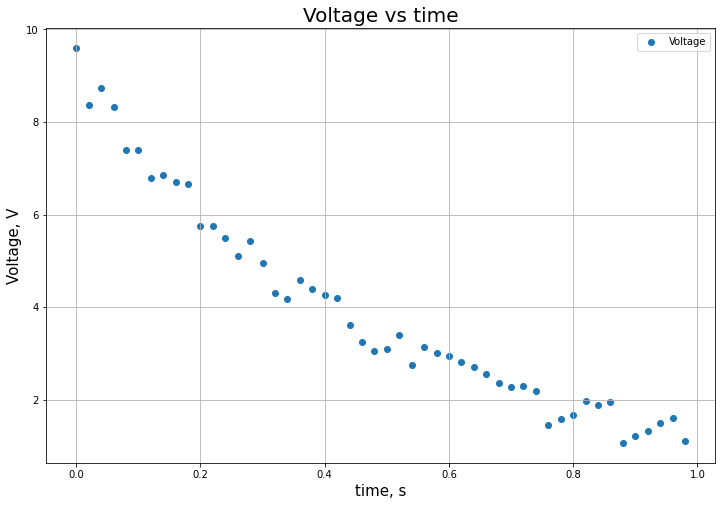

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

#graph settings
ax.set_title("Voltage vs time", fontsize=20)
ax.set_xlabel('time, s',  fontsize=15)
ax.set_ylabel('Voltage, V',  fontsize=15)

ax.scatter(X, y, label="Voltage")

plt.legend()
plt.grid()
plt.show()

As it can be seen from the scatter plot, the data sampling is noicy. The gradient of this plot is negative and non-constant (there is a slight flexure). So, it is unlikely that the best-fit curve is a straight line. 

At first, I will write a function for analytical approach. np.linalg.inv() function is used to compute inverse matrix:

In [ ]:
def analytical_solution(X, y):
  return np.array(np.linalg.inv(X.T@X)@X.T@y) 


I have implemented multiple functions that are needed while linear regression, namely fit(), loss(), predict() and others, but there are too many of them. So it will be more structured if I create a class Linear regression that posses all these functions:

In [ ]:
class LinearRegression(object):
    # at first we should initialize an object of a class
    def __init__(self):
        # w is the the array of coefficients of eqiation
        # when the object of class initialized at first, the coefficient are None
        self.w = None

    # then we fit the data to our linear regression model
    # epochs are number of iterations
    # lr – learning rate. if lr is too small then regression may take long time 
    # to converge. if it is too big, then it may miss the global minimum of cost function    
    
    def fit(self, X, y, epochs=10, lr=0.01):
      # measures - number of records, features – number of columns
      measures, features = X.shape
        
      # randomly generate the innitial values for coefficients
      if self.w is None:
            self.w = np.random.randn(features)
        
      # we will needed losses at each iteration to asses if cost function converged
      losses = [] 
        
      for i in range(epochs):
        # calculate hypothesis
        h =self.predict(X)
            
        # calculate loss
        losses.append(self.loss(y, h))
            
        #update coefficients
        self.w -= lr * self.get_grad(X, y, h)
      return losses

    def get_grad(self, X, y, h):
      # calculate gradient using formula
      return np.dot(X.T, (h - y))/len(y)

    def predict(self, X):
      return X@self.w

    def get_weights(self):
      return self.w

    def loss(self, y, h):
      # calculate cost function using formula
      return np.sum((h - y)**2)/2/len(y)
    
    def error(self, y, h):
      return mean_absolute_error(y, h)


At each stage our linear regression model will accumulated values for losses. To see if our solution is converged, we need a graph of loss versus number of iterations. This graph will be plotted after each linear model, so we need a function:

In [ ]:
def losses_graph(loss):
  fig, ax = plt.subplots(figsize=(12,8))
  plt.xscale('log')
  ax.set_title("Cost function vs number of iterations", fontsize=20)
  ax.set_xlabel('n, iter',  fontsize=15)
  ax.set_ylabel('Cost function',  fontsize=15)
  ax.plot(np.arange(len(loss)), loss)
  plt.grid()
  plt.show()


###Part 2 – Curve fitting

####Straight line
We have our $x$ and $y$ data that we should pass to our linear regression model. But as it was discussed in the "Methods" section we need to add bias term to $X$ matrix:


In [ ]:
X_first = np.vstack((np.ones(len(X)),X)).T

Lets compute coefficient with analytical approach and save them as numpy array. Then compute values for our prediction:

In [ ]:
weights = analytical_solution(X_first, y)
pred_analytical = X_first@weights
error_analytical = mean_absolute_error(y, pred_analytical)
print(f"The straight line equation with analytical methdod:\ny={weights[0]}{weights[1]}x")
print(f"The absolute error: {error_analytical}")

The straight line equation with analytical methdod:
y=7.670451687058819-7.52754938428331x
The absolute error: 0.5047181244294392


I initialise an object of Linear regression class and fit this model with our data. The `fit()` return us a list of values of cost function at each iteration. As we can see after 8000 iterations, the solution converged. It is very important that values of cost function decreases with number of iterations. It means that it works fine for our data.

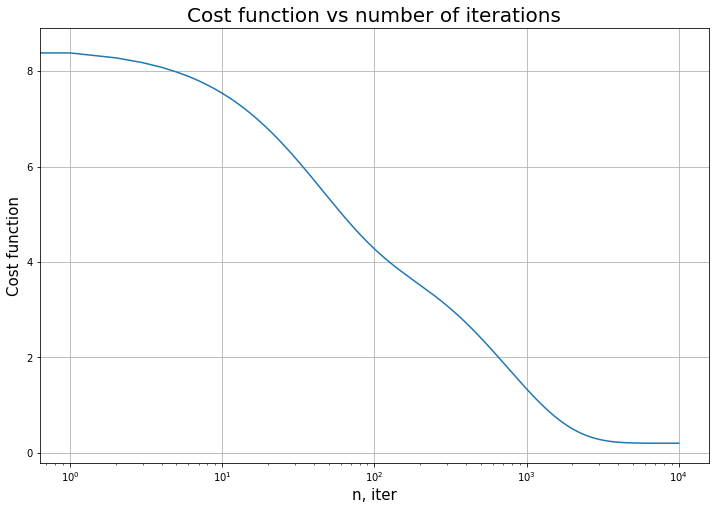

In [ ]:
model_line = LinearRegression()
loss_line = model_line.fit(X_first, y, 10000)
losses_graph(loss_line)

Now, lets look at how well our straight line fits sampling data. To do this, we will need to plot our curve and data points, so we need a function to do this:

In [ ]:
def graph_fit(X, y, pred, name=""):
  fig, ax = plt.subplots(figsize=(12,8))
  
  # fit line
  ax.plot(X,  pred, c='r')
  # original data
  ax.scatter(X,y)
  
  #graph settings
  ax.set_title(name, fontsize=20)
  ax.set_xlabel('t, s',  fontsize=15)
  ax.set_ylabel('V, V',  fontsize=15)
  
  plt.grid()
  plt.show()

Now, lets try to plot the the straight line through our data:

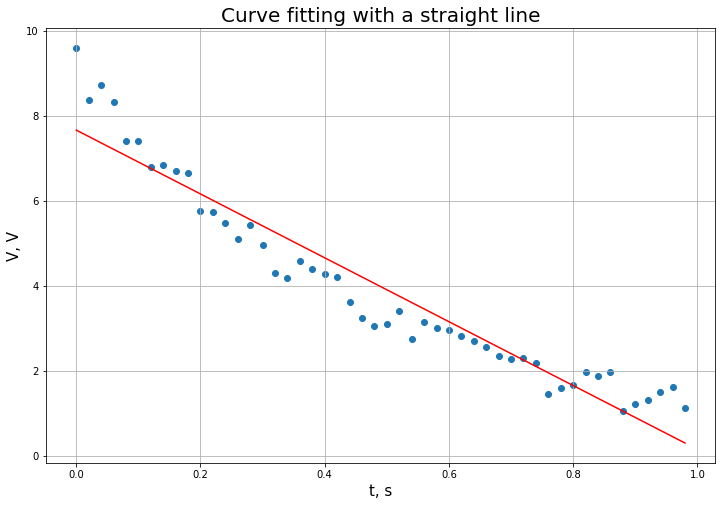

In [ ]:
pred_line = model_line.predict(X_first)
graph_fit(X, y, pred_line, 'Curve fitting with a straight line')

In [ ]:
model_line.get_weights()

array([ 7.66346374, -7.51423324])

In [ ]:
coef_line = model_line.get_weights()
function_first=f"The equation rounded to four significant figures for pretty print purposes:\nV(t)={coef_line[0]:.3f}{coef_line[1]:.3f}t "
print(function_first)

The equation rounded to four significant figures for pretty print purposes:
V(t)=7.663-7.514t 


In [ ]:
error_first = model_line.error(y, pred_line)
print(f"The mean absolute error of the curve-fitting with straight line is {error_first},\nwhile error of analytical approach is {error_analytical}")

The mean absolute error of the curve-fitting with straight line is 0.5044068905626525,
while error of analytical approach is 0.5047181244294392


The error of both solutions are quite close, however it took 10000 thousand interations for gradient descent converge to this accuracy.

####Exponential function
As it has already beed described in the methods section, the exponential function also can be expressed as linear one:
$$f(x)=Ce^{a_1x}=e^{a_0+a_1x}$$
if we take the logarithm of both sides:
$$ln(f(x)) = a_0+a_1x$$

So, the procedure with exponential function is approximately the same, except we pass $ln(y)$:

In [ ]:
weights_exp = np.array(analytical_solution(X_first, np.log(y)))
pred_analytical_exp = np.exp(X_first@weights_exp)
error_analytical_exp = mean_absolute_error(y, pred_analytical_exp)
analytical_func = f"V(t) = {np.exp(weights_exp[0]):.4f}e^({weights_exp[1]:.4f}x)"
print(f"The straight line equation with analytical methdod:\n{analytical_func}")
print(f"The absolute error: {error_analytical_exp}")

The straight line equation with analytical methdod:
V(t) = 9.0931e^(-2.0300x)
The absolute error: 0.23898182553051986


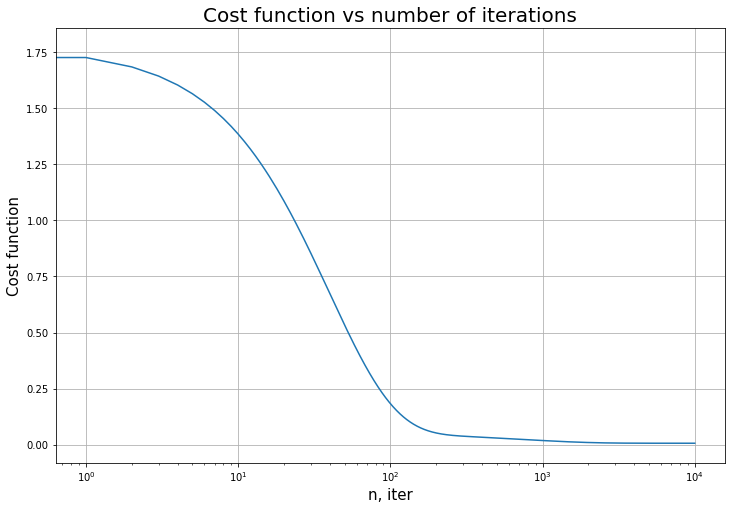

In [ ]:
model_exp = LinearRegression()
loss_exp = model_exp.fit(X_first, np.log(y), 10000)
losses_graph(loss_exp)

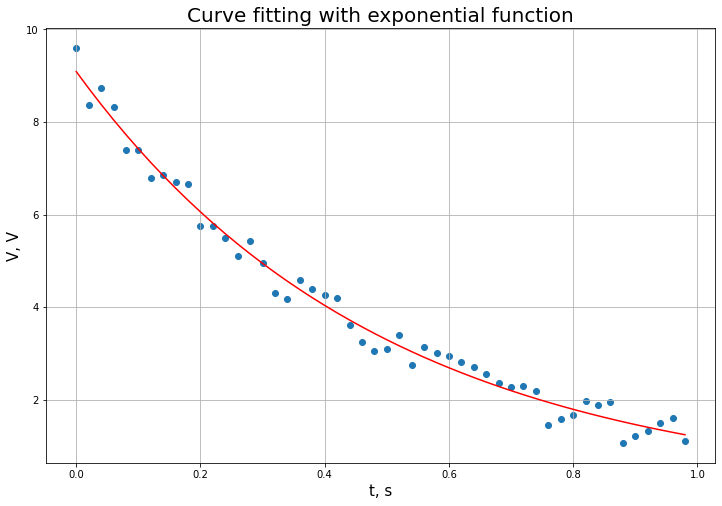

In [ ]:
pred_exp = np.exp(model_exp.predict(X_first))
graph_fit(X, y, pred_exp, 'Curve fitting with exponential function')

In [ ]:
a_0, a_1 = model_exp.get_weights()
np.exp(a_0), a_1

(9.08650837121911, -2.0286617143849566)

In [ ]:
function_second=f"V(t)={np.exp(a_0):.4f}e^({a_1:.4f}t)"
print(function_second)

V(t)=9.0865e^(-2.0287t)


In [ ]:
error_second=model_exp.error(y, pred_exp)
print(f"The mean absolute error of the curve-fitting with straight line is {error_second},\nwhile error of analytical solution is {error_analytical_exp}")

The mean absolute error of the curve-fitting with straight line is 0.2389619795031303,
while error of analytical solution is 0.23898182553051986


Similar to straight line fitting result.

####Polinomial regression of second order


In [ ]:
X_polinom = np.vstack((X_first.T, (X**2))).T

In [ ]:
weights_pol = np.array(analytical_solution(X_polinom, y))
pred_analytical_pol = X_polinom@weights_pol
error_analytical_pol = mean_absolute_error(y, pred_analytical_pol)
print(f"The straight line equation with analytical methdod:\ny = {weights_pol[0]}{weights_pol[1]}x+{weights_pol[2]}x^2)")
print(f"The absolute error: {error_analytical_pol}")

The straight line equation with analytical methdod:
y = 8.857746774637075-14.948143681647478x+7.572034997310411x^2)
The absolute error: 0.2650493812156886


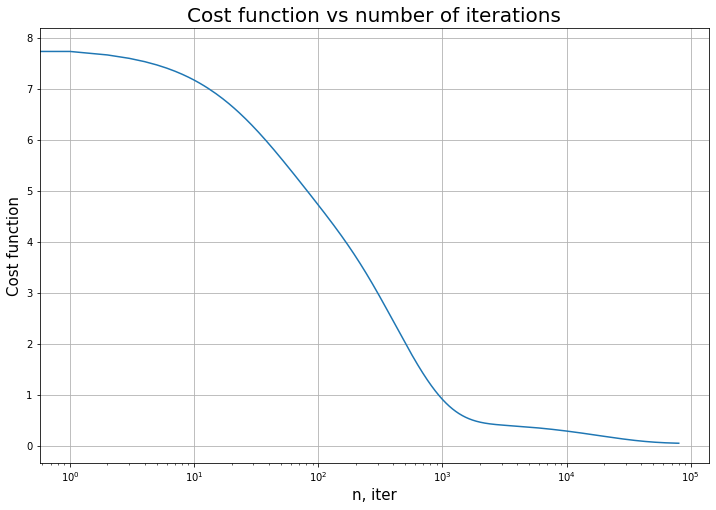

In [ ]:
model_polinom = LinearRegression()
loss_polinom = model_polinom.fit(X_polinom, y, 80000)
losses_graph(loss_polinom)

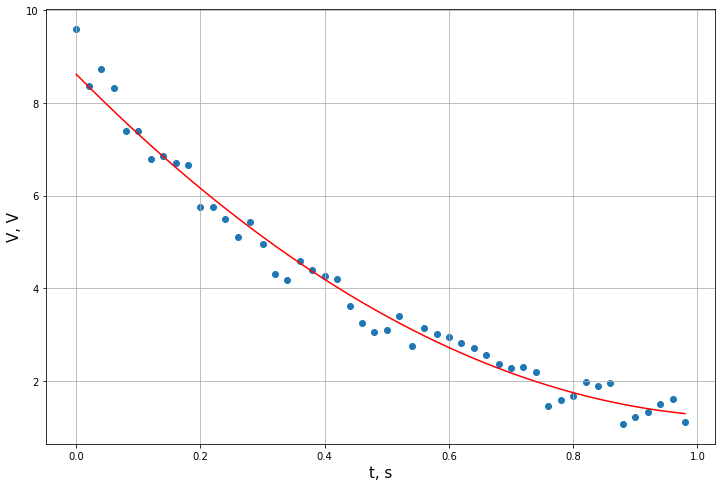

In [ ]:
pred_polinom = model_polinom.predict(X_polinom)
graph_fit(X, y, pred_polinom)

In [ ]:
coef = model_polinom.get_weights()
function_third = f"V(t) = {coef[0]:.3f}{coef[1]:.3f}t+{coef[2]:.3f}t^2"
print(function_third )

V(t) = 8.619-13.561t+6.207t^2


In [ ]:
error_third = model_polinom.error(y, pred_polinom)
print(f"The mean absolute error of the curve-fitting with straight line is {error_third},\nwhile absolute error with analytical approach {error_analytical_pol}")

The mean absolute error of the curve-fitting with straight line is 0.25777398670335616,
while absolute error with analytical approach 0.2650493812156886


Overall gradient descent took much longer to compute coefficient of our equations, especially in fitting polinomial of second order. I will consider equations gained with gradient descent as valid ones, however result of analytical approach (least-square regression) are also quite good. But if it was a bigger matrix, the difference betrween those two methods could be more obvious, as method of least-squared regression usually does not work well for complex functions.

###Discussion

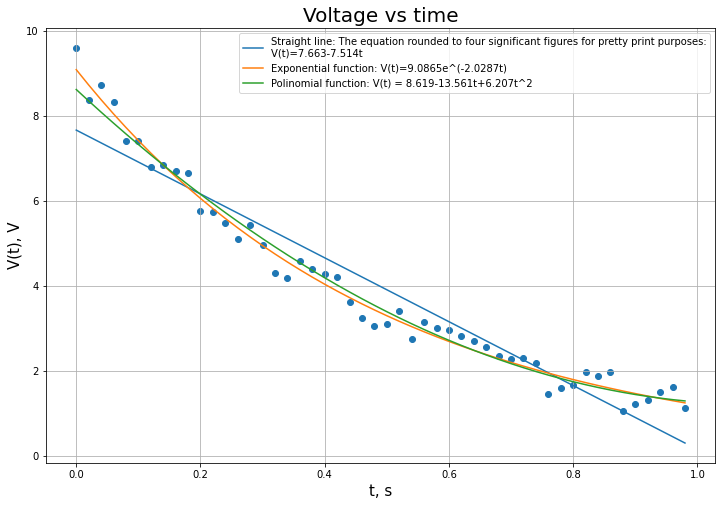

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
  
# fit line
ax.plot(X,  pred_line, label="Straight line: " + function_first)
ax.plot(X,  pred_exp, label="Exponential function: "+ function_second)
ax.plot(X,  pred_polinom, label="Polinomial function: "+ function_third)

# original data
ax.scatter(X,y)
  
#graph settings
ax.set_title("Voltage vs time", fontsize=20)
ax.set_xlabel('t, s',  fontsize=15)
ax.set_ylabel('V(t), V',  fontsize=15)
  
plt.legend()
plt.grid()
plt.show()

In [ ]:
Data={'Method':["Straight line", "Exponential function","Polinom of second order"], 
      'Equation':[function_first,function_second,function_third ],
      'Absolute error':[error_first, error_second,error_third],
      'Number of iterations':[len(loss_line), len(loss_exp), len(loss_polinom)],
      'Phycical meaning':["?","V_c(t)=V_0*e^(-t/(RC))","?"]}
results = pd.DataFrame(Data)
results

,Method,Equation,Absolute error,Number of iterations,Phycical meaning
0,Straight line,The equation rounded to four significant figur...,0.504407,10000,?
1,Exponential function,V(t)=9.0865e^(-2.0287t),0.238962,10000,V_c(t)=V_0*e^(-t/(RC))
2,Polinom of second order,V(t) = 8.619-13.561t+6.207t^2,0.257774,80000,?


According the results, the exponential function has fitted the sampling data with the minimum mean absolute error. Whereas polinomial function has a close error, it took too many iterations to converge and requires feature engineering (creating new feature makes matrix to be more computationally expensive). Because of this additional feature, it was more difficult for gradient descent to converge. 

There is also possible physical meaning for the exponential function. It is likely that the student has been recording the value of voltage across capacitor when it had been discharging, since it changes by equation similar to:
$$V_C=V_0e^{\frac{-t}{RC}}$$
Where $\tau=RC$ is time constant for circuit in seconds.
If the student indeed measured voltage across capasitor, then we can conclude that:

In [ ]:
print(f"V_0 = {np.exp(a_0)} V, tau={-1/a_1} s")

V_0 = 9.08650837121911 V, tau=0.4929358073399522 s


So, I have determined that possible equation for our sample data is exponential function, lets try to identify even better solution with python library. For this purposes I will use Linear regression model from `sclearn library:`

In [ ]:
from sklearn.linear_model import LinearRegression as LR

In [ ]:
python_model = LR()
python_model.fit(X.reshape((-1, 1)), np.log(y))
pred_python = np.exp(python_model.predict(X.reshape((-1, 1))))
coef = python_model.intercept_, python_model.coef_[0]
coef

(2.2075110258064226, -2.0300343269602195)

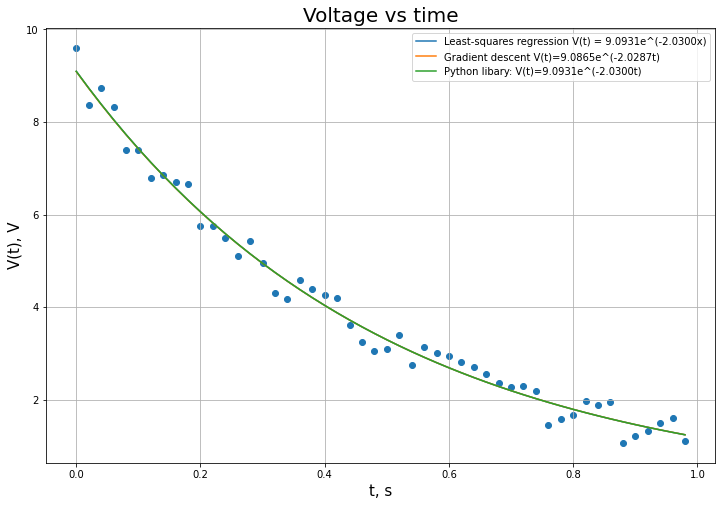

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
  
# fit line
ax.plot(X,  pred_analytical_exp, label="Least-squares regression " + analytical_func)
ax.plot(X,  pred_exp, label="Gradient descent "+ function_second)
ax.plot(X,  pred_python, label=f"Python libary: V(t)={np.exp(coef[0]):.4f}e^({coef[1]:.4f}t)")

# original data
ax.scatter(X,y)
  
#graph settings
ax.set_title("Voltage vs time", fontsize=20)
ax.set_xlabel('t, s',  fontsize=15)
ax.set_ylabel('V(t), V',  fontsize=15)
  
plt.legend()
plt.grid()
plt.show()

All three function overlap each other, so our equation seems to be corect one.

In [ ]:
print(f"With python linbrary we have the absolute error of {mean_absolute_error(y,pred_python)}\nwhich is similar to {error_second} of gradient descent and {error_analytical_exp} of analytical method")

With python linbrary we have the absolute error of 0.23898182553051975
which is similar to 0.2389619795031303 of gradient descent and 0.23898182553051986 of analytical method


So, it is seems to me that the result of gradient descent is the most accurate and it the minimum possible for our data at least with basic approaches as there are many other tecniques which are way faster.

---
##Conclusion

In this experiment we have tried out different ways for curve fitting. We created from scratch linear regression model with gradient descent, least-squares method and Linear Regression model from `skilearn` library. 

We have tested all our assumptions about possible curves that can fit our data better. As it turned out the best result was shown by exponential function:

In [ ]:
results

,Method,Equation,Absolute error,Number of iterations,Phycical meaning
0,Straight line,The equation rounded to four significant figur...,0.504407,10000,?
1,Exponential function,V(t)=9.0865e^(-2.0287t),0.238962,10000,V_c(t)=V_0*e^(-t/(RC))
2,Polinom of second order,V(t) = 8.619-13.561t+6.207t^2,0.257774,80000,?


The mean absolute error of exponential function is 0.238974, which is minimum that we could achieved. We achieved similar result with three methods, namely gradient descent, analytical aproach and python library. The slowest one, but the most accurate was gradient descent. I personally do not recommend to use gradient descent for simple and small data set. If we do not have time to import such libraries as sklearn and want to get an fast solution at place, I would recomend to use least-squares regression.

In the future, it will be better if we try to fit a more complex function that will have some local minima and maxima at least, so that the drawbacks of each method could be more obvious. In case of our problem, the gradient descent is to difficult algorithm for more complex purposes that was used for simple problem. 

This programming assignment again showed us the importance of analysing our problem precisely before trying out different methods. I will definetely use both gradient descent and least-squares methods if I will need to solve a regression model to make a prognosis.